In [1]:
import glob
import os
import xml.etree.ElementTree as ET

In [2]:
XML_PATH = "D:/PALM-DATASET-SSD/dataset/test/*.xml"
IMG_PATH = "D:/PALM-DATASET-SSD/dataset/test/*.jpg"

In [3]:


global name
global boxes

def xml_read(xml_path):
    xml_path = str(xml_path)

    def read_content(xml_file: str):

        tree = ET.parse(xml_file)
        root = tree.getroot()

        list_with_all_boxes = []

        for boxes in root.iter('object'):

            filename = root.find('filename').text
            #print(filename)

            ymin, xmin, ymax, xmax = None, None, None, None

            ymin = int(boxes.find("bndbox/ymin").text)
            xmin = int(boxes.find("bndbox/xmin").text)
            ymax = int(boxes.find("bndbox/ymax").text)
            xmax = int(boxes.find("bndbox/xmax").text)
            
            list_with_single_boxes = [xmin, ymin, xmax, ymax]
            list_with_all_boxes.append(list_with_single_boxes)

        return filename, list_with_all_boxes
    

    name, boxes = read_content(xml_path)
    

    

    global box_content
    box_content = boxes

    
    

In [4]:

def img_read(img_path):
    img_path = str(img_path)
    #load image and draw
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from PIL import Image

    im = Image.open(img_path)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(im)

    for i in range(len(box_content)):
    # Create a Rectangle patch
    
        x_min = box_content[i][0]
        y_min = box_content[i][1]
        x_max = box_content[i][2]
        y_max = box_content[i][3]
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='r', facecolor='none')
      

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

D:/PALM-DATASET-SSD/dataset/test\1593610921220.jpg


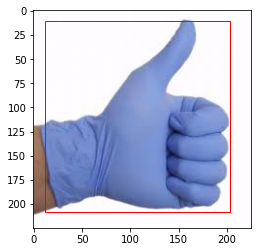

D:/PALM-DATASET-SSD/dataset/test\1593610921221.jpg


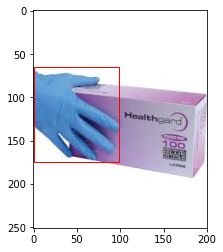

D:/PALM-DATASET-SSD/dataset/test\1593610921244.jpg


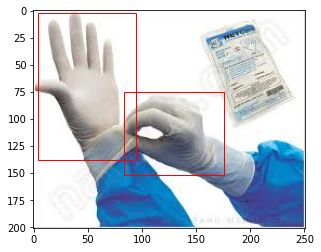

D:/PALM-DATASET-SSD/dataset/test\1593610921262.jpg


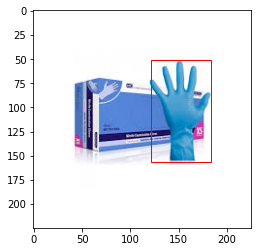

D:/PALM-DATASET-SSD/dataset/test\1593610921270.jpg


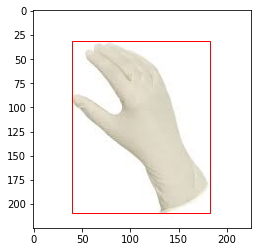

D:/PALM-DATASET-SSD/dataset/test\1593610921274.jpg


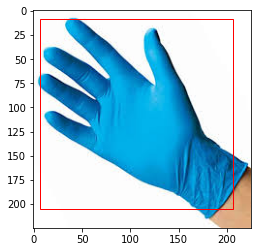

D:/PALM-DATASET-SSD/dataset/test\1593610921275.jpg


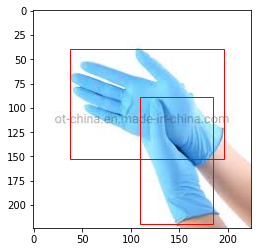

D:/PALM-DATASET-SSD/dataset/test\1593610921319.jpg


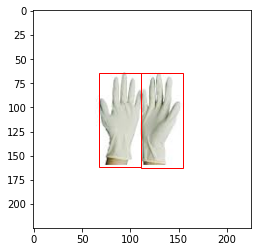

D:/PALM-DATASET-SSD/dataset/test\1593610921320.jpg


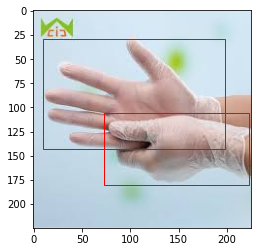

D:/PALM-DATASET-SSD/dataset/test\1593610921324.jpg


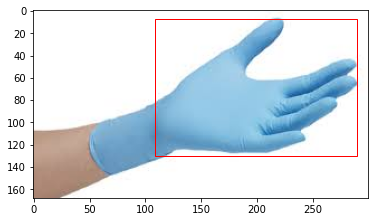

D:/PALM-DATASET-SSD/dataset/test\1593610921351.jpg


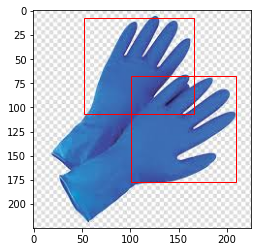

D:/PALM-DATASET-SSD/dataset/test\1593610921378.jpg


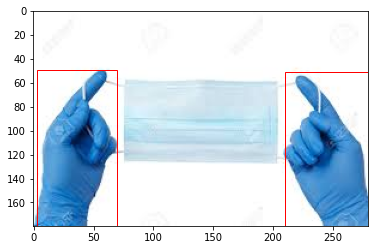

D:/PALM-DATASET-SSD/dataset/test\1593610921394.jpg


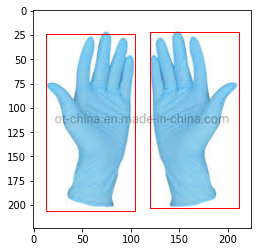

D:/PALM-DATASET-SSD/dataset/test\1593685656000.jpg


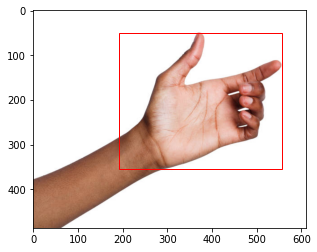

D:/PALM-DATASET-SSD/dataset/test\1593685656001.jpg


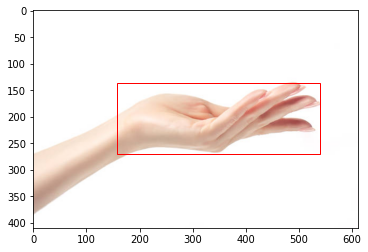

D:/PALM-DATASET-SSD/dataset/test\1593685656003.jpg


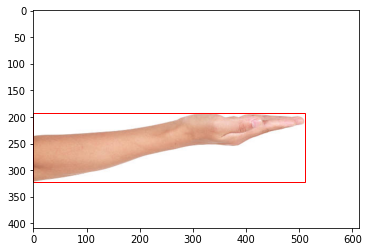

D:/PALM-DATASET-SSD/dataset/test\1593685656004.jpg


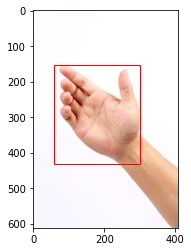

D:/PALM-DATASET-SSD/dataset/test\1593685656005.jpg


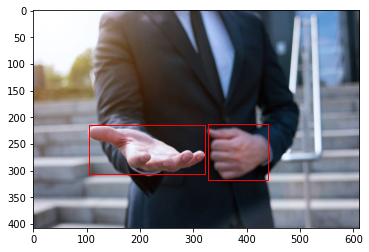

D:/PALM-DATASET-SSD/dataset/test\1593685656006.jpg


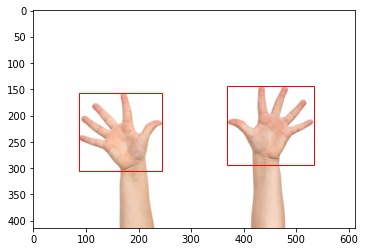

D:/PALM-DATASET-SSD/dataset/test\1593685656007.jpg


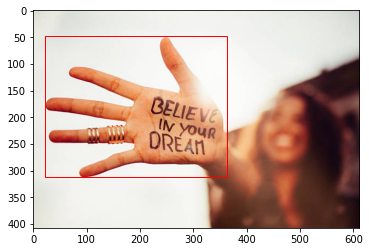

D:/PALM-DATASET-SSD/dataset/test\1593685656008.jpg


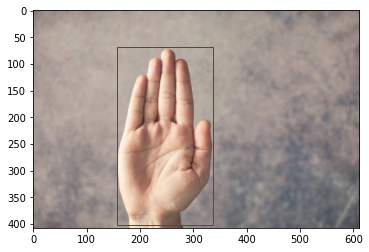

D:/PALM-DATASET-SSD/dataset/test\1593685656010.jpg


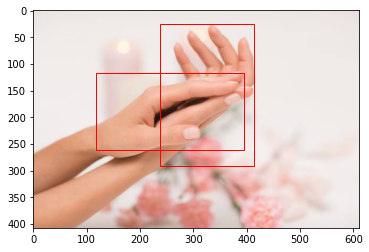

D:/PALM-DATASET-SSD/dataset/test\1593685656020.jpg


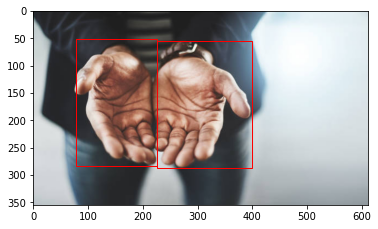

D:/PALM-DATASET-SSD/dataset/test\1593685656021.jpg


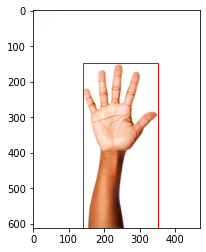

D:/PALM-DATASET-SSD/dataset/test\1593685656022.jpg


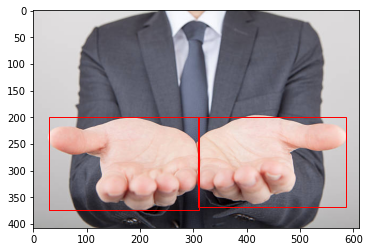

D:/PALM-DATASET-SSD/dataset/test\1593685909862.jpg


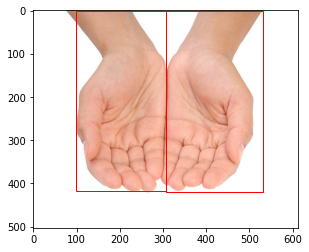

D:/PALM-DATASET-SSD/dataset/test\1593685909866.jpg


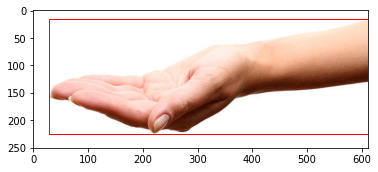

D:/PALM-DATASET-SSD/dataset/test\1593685909869.jpg


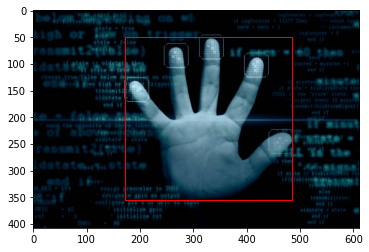

D:/PALM-DATASET-SSD/dataset/test\1593685909870.jpg


KeyboardInterrupt: 

In [5]:

#for filename in glob.glob('images_xml/*.xml'):
for file, img in zip(glob.glob(XML_PATH), glob.glob(IMG_PATH)):
    print(img)
    xml_read(file)
    img_read(img)
    
    #xml_renamer(filename)
    
    
      # do your stuff